# Time Series Forecast & Predictions

Analyze Walmart datasets to predict weekly sales based on store and dept.

# Datasets
The datasets chosen were provided by Walmart on the Kaggle website (https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting). The datasets consist of store features and historical sales data for 45 store in different regions.


# Description of Variables
The 'store' dataset contains store information - 3 variables and 45 observation:
- *Store:* store number
- *Type:* type of store (A, B, C)
- *Size:* store size

The 'features' dataset contains store features - 12 variables and 8190 observation:
- *Store:* store number
- *Date:* Date
- *Temperature:* temperature
- *Fuel_Price:* price of fuel
- *MarkDown1:* total for 1st markdown
- *MarkDown2:* total for 2nd markdown
- *MarkDown3:* total for 3rd markdown
- *MarkDown4:* total for 4th markdown
- *MarkDown5:* total for 5th markdown
- *CPI:* Consumer Price Index. A measure of changes in the purchasing-power of a currency and the rate of inflation.
- *Unemployment:* total unemployment
- *IsHoliday:* is it a holiday or non-holiday (True = holiday, False =  non-holiday)

The 'train' datasets contain weekly sales - 5 variables and 421570 observation:
- *Store:* store number
- *Dept:* department number
- *Date:* Date
- *Weekly_Sales:* weekly sales
- *IsHoliday:* is it a holiday or non-holiday (True = holiday, False =  non-holiday)  

The 'test' dataset is similar to the 'train' dataset. It contains weekly sales - 5 variables and 115064 observation. This dataset will be use for the sales predictions. 
- *Store:* store number
- *Dept:* department number
- *Date:* Date
- *IsHoliday:* is it a holiday or non-holiday (True = holiday, False =  non-holiday) 

# Problem Statement
According to the Kaggle site, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

**Superbowl:** February 7, 2010, February 6, 2011, February 5, 2012, , February 3, 2013  
**Labor Day:** September 6, 2010, September 5, 2011, September 3, 2012, September 2, 2013   
**Thanksgiving:** November 25,2010 November 24,2011, November 22, 2012, November 28, 2013  
**Christmas:** December 25  

The goal is to predict the department-wide sales for each department in each store. 

# 1. Exploratory Analysis
Exploring and understanding the data.

### Summary Statistics  

Summary statistics provide a quick look at the limits of observed values. It can help to get a quick idea of what we are working with.

In [291]:
#Load Library
import pandas as pd #data analysis and dataframe
from pandas import DataFrame, Series
import numpy as np #multi-dimensional array for effecient math and logic operations
import matplotlib.pyplot as plt #2D & 3D graphics library for generating scientific figures
import seaborn as sns #descriptive statistics and visualizations runs on top of matplotlib
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

#allows graphs to display without using plt.show()
%matplotlib inline 

#Format DataFrames, Series, Tuple for easy view
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read() #requires both files saved in the same folder as the current notebook
HTML('<style>{}</style>'.format(css))

In [292]:
# summary statistics of time series
from IPython.display import display

#Load Data sets
stores_raw = pd.read_csv('stores.csv')
features_raw = pd.read_csv('features.csv')
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

display(stores_raw.info())
display(stores_raw.describe())
display(stores_raw.head(3))
display(stores_raw.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


None

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


,Store,Type,Size
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [293]:
#Change object 'Date' to datetime 
features_raw['Date'] =  pd.to_datetime(features_raw['Date'])

display(features_raw.info())
display(features_raw.describe())
display(features_raw.Date.describe())
display(features_raw.head(3))
display(features_raw.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


None

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


count                    8190
unique                    182
top       2011-07-15 00:00:00
freq                       45
first     2010-02-05 00:00:00
last      2013-07-26 00:00:00
Name: Date, dtype: object

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


Date range is from 2010-02-05 through 2013-07-26. There are negative values in the MarkDown columns. There are also 'NaN' values in the dataset. 'NaN' values can be replace by 0.

In [294]:
#Change object 'Date' to datetime 
train_raw['Date'] =  pd.to_datetime(train_raw['Date'])

display(train_raw.info())
display(train_raw.describe())
display(train_raw.Date.describe())
display(train_raw.head(3))
display(train_raw.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


None

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


count                  421570
unique                    143
top       2011-12-23 00:00:00
freq                     3027
first     2010-02-05 00:00:00
last      2012-10-26 00:00:00
Name: Date, dtype: object

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


,Store,Dept,Date,Weekly_Sales,IsHoliday
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


Date range is from 2010-02-05 through 2012-10-26. Min Weekly_Sales is a negative value. A possible explanation for the negative sales is that returns exceeds sales.

In [295]:
#Change object 'Date' to datetime 
test_raw['Date'] =  pd.to_datetime(test_raw['Date'])

display(test_raw.info())
display(test_raw.describe())
display(test_raw.Date.describe())
display(test_raw.head(3))
display(test_raw.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null datetime64[ns]
IsHoliday    115064 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


None

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


count                  115064
unique                     39
top       2012-12-21 00:00:00
freq                     3002
first     2012-11-02 00:00:00
last      2013-07-26 00:00:00
Name: Date, dtype: object

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


,Store,Dept,Date,IsHoliday
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


Date range is from 2012-11-2 through 2013-07-26. The test dataset is similar to the train dataset without the Weekly_Sales data. We will use this file for our predictions.

### Plot data 

A line plot of a time series can provide a lot of insight into the problem. The example below
creates and shows a line plot of the dataset.

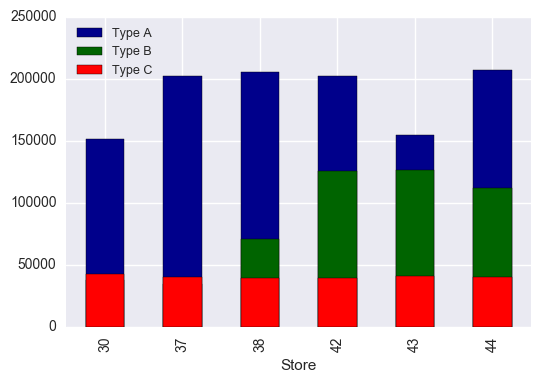

In [296]:
Store_TypeA = stores_raw[stores_raw['Type'] == 'A']
Store_TypeB = stores_raw[stores_raw['Type'] == 'B']
Store_TypeC = stores_raw[stores_raw['Type'] == 'C']

ax=Store_TypeA.plot(x='Store', y='Size', kind='bar', color='DarkBlue', label='Type A')
Store_TypeB.plot(x='Store', y='Size', kind='bar', color='DarkGreen', label='Type B', ax=ax)
Store_TypeC.plot(x='Store', y='Size', kind='bar', color='Red', label='Type C', ax=ax)

lgnd = plt.legend(loc="upper left", numpoints=1, fontsize=9)
plt.show()

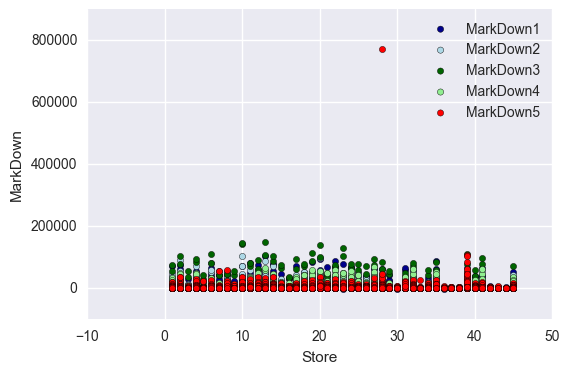

In [297]:
features = features_raw

ax=features.plot(x='Store', y='MarkDown1', kind='scatter', color='DarkBlue', label='MarkDown1')
features.plot(x='Store', y='MarkDown2', kind='scatter', color='LightBlue', label='MarkDown2', ax=ax)
features.plot(x='Store', y='MarkDown3', kind='scatter', color='DarkGreen', label='MarkDown3', ax=ax)
features.plot(x='Store', y='MarkDown4', kind='scatter', color='LightGreen', label='MarkDown4', ax=ax)
features.plot(x='Store', y='MarkDown5', kind='scatter', color='Red', label='MarkDown5', ax=ax)
ax.set_ylabel("MarkDown")

plt.show()

In [298]:
features.MarkDown5.max()
features.loc[features['MarkDown5'] > 200000]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
5059,28,2012-11-16,49.39,3.834,10431.55,184.51,42.72,1422.57,771448.1,131.3258,10.199,False


Outlier for MarkDown5 (771448) is on a non-holiday in Store 28. This could be an entry error. We can omit this outlier from the analysis.

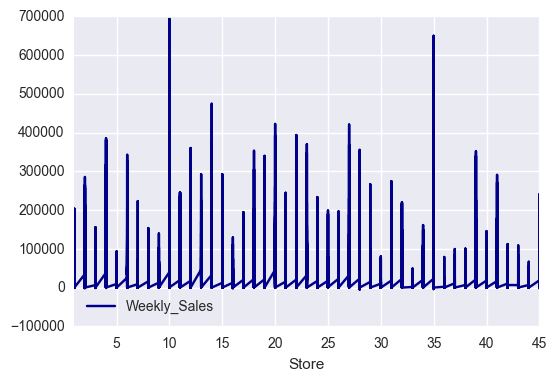

In [299]:
ax=train_raw.plot(x='Store', y='Weekly_Sales', kind='line', color='DarkBlue', label='Weekly_Sales')

The top highest Weekly_Sales are in Store 10, 14, and 35. Let's take a closer look at store 10.

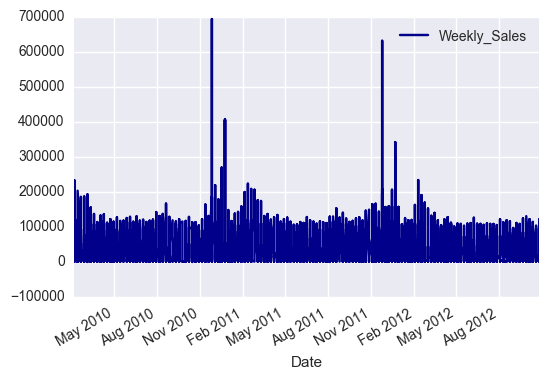

,Store,Dept,Date,Weekly_Sales,IsHoliday
88428,10,7,2010-12-24,406988.63,False
95373,10,72,2010-11-26,693099.36,True
95377,10,72,2010-12-24,404245.03,False
95425,10,72,2011-11-25,630999.19,True


In [300]:
t_store10=train_raw.loc[train_raw['Store'] == 10]
ax=t_store10.plot(x='Date', y='Weekly_Sales', kind='line', color='DarkBlue', label='Weekly_Sales')
plt.show()

t_store10.loc[t_store10['Weekly_Sales'] > 400000]

The spikes in December indicates that Weekly_Sales appear to be seasonal. Dept 72 contains the highest Weekly_Sales in Store 10. Both Weekly_Sales are in November(Thanksgiving Holiday).

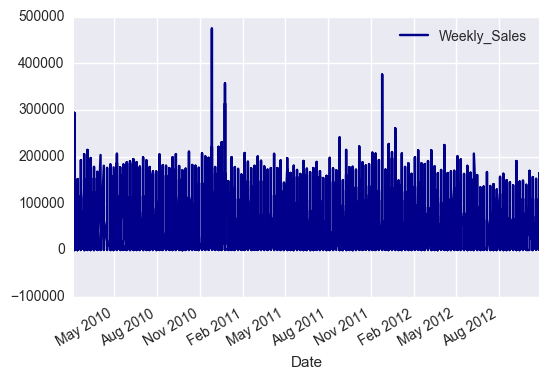

,Store,Dept,Date,Weekly_Sales,IsHoliday
128984,14,7,2010-12-24,356867.25,False
135665,14,72,2010-11-26,474330.10,True
135669,14,72,2010-12-24,313933.22,False
135717,14,72,2011-11-25,375948.31,True


In [301]:
t_store14=train_raw.loc[train_raw['Store'] == 14]
ax=t_store14.plot(x='Date', y='Weekly_Sales', kind='line', color='DarkBlue', label='Weekly_Sales')
plt.show()

#t_store14.Weekly_Sales.max()
t_store14.loc[t_store14['Weekly_Sales'] > 300000]

The spikes in December indicates that Weekly_Sales appear to be seasonal. Similar to store 10, Dept 72 contains the highest Weekly_Sales in Store 14. Both Weekly_Sales are in November(Thanksgiving Holiday). Same with Store 35.

### Seasonal Line Plots  
We can confirm the assumption that the seasonality is a yearly cycle by eyeballing line plots of
the dataset by year. The example below takes the 7 full years of data as separate groups and
creates one line plot for each. The line plots are aligned vertically to help spot any year-to-year
pattern.

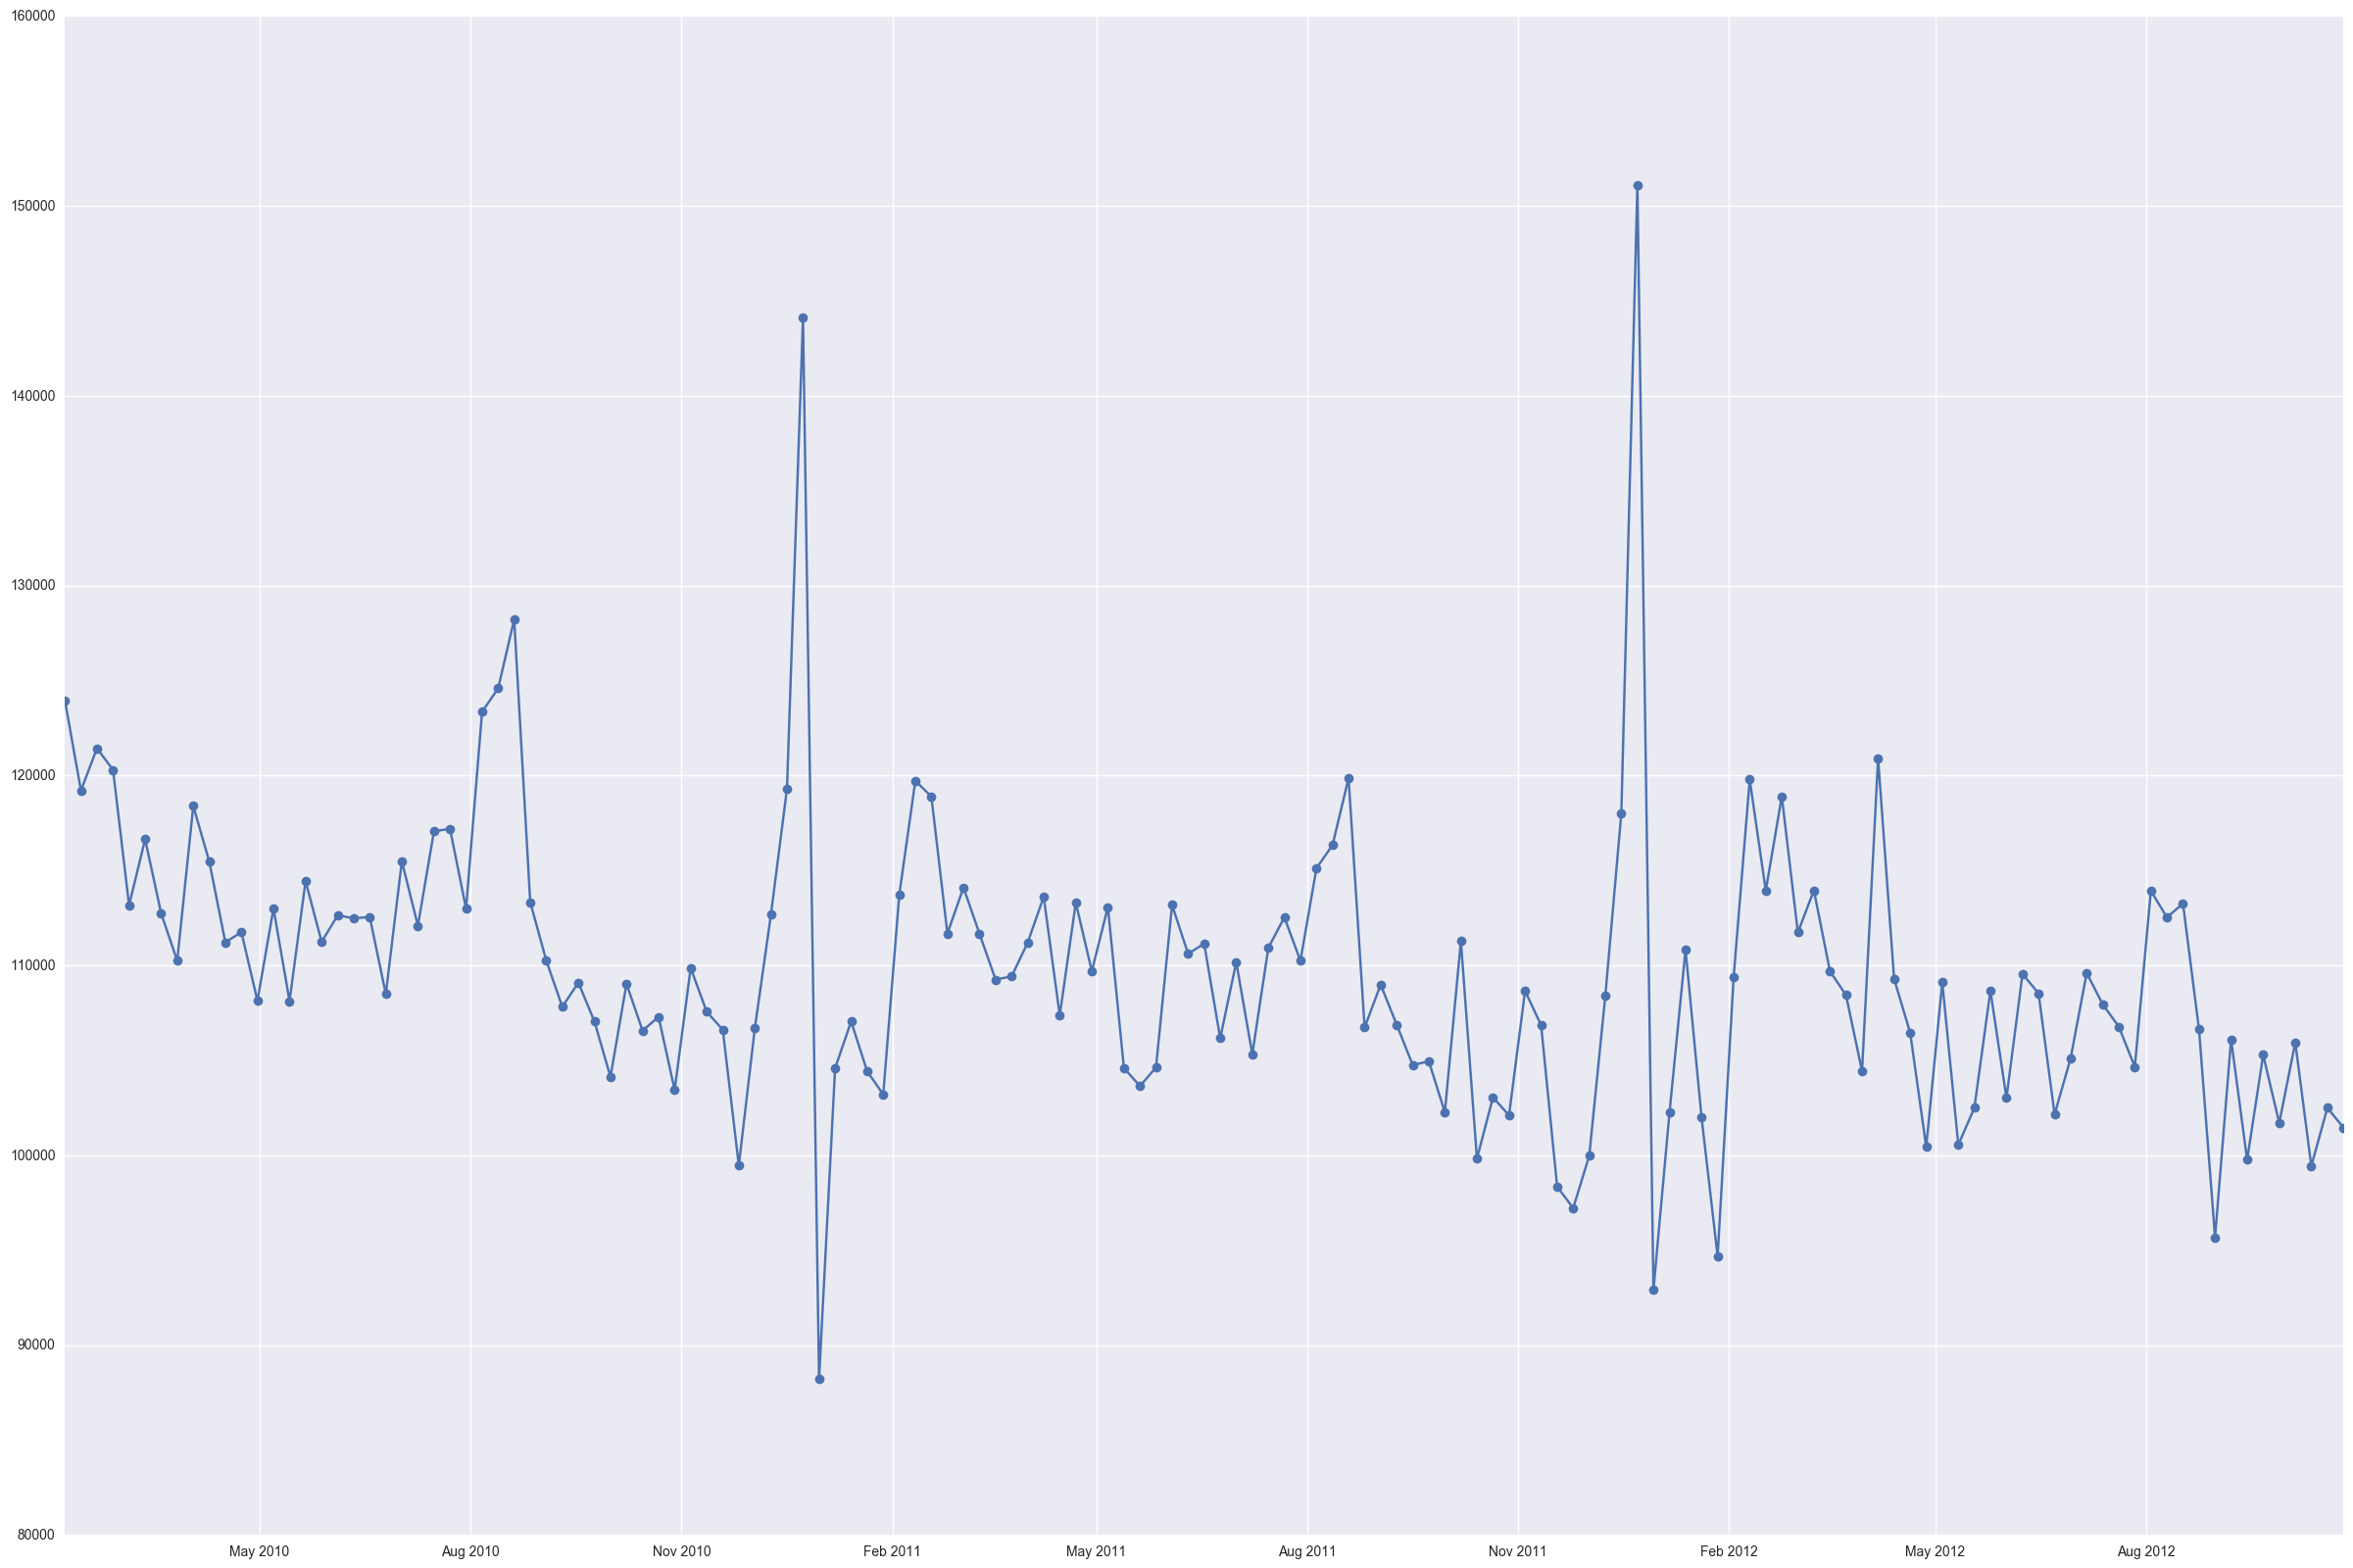

In [302]:
#Change object 'Date' to datetime 
train_raw['Date'] =  pd.to_datetime(train_raw['Date'])

# create 'ID' variable containing Store and dept
train_raw['ID'] = train_raw['Store'].map(str) + "-" + train_raw['Dept'].map(str)

tstore10dept72 = train_raw.loc[train_raw['ID'] == '10-2']

tstore10dept72 = tstore10dept72[['Date', 'Weekly_Sales']] # choose only 'Date' & 'Weekly_Sales'
tstore10dept72 = tstore10dept72.set_index('Date') # set 'Date' as index

plt.figure(figsize=(30,20))
plt.plot(tstore10dept72, marker='o')

Plotting Store 10 dept 72, confirms the Weekly_Sales trend for Holidays. There is a trend - several spikes in November, December, and February.

There is seasonality – a regularly repeating pattern of highs and lows related to month of the year. There is also a varying spread of data over time, therefore this is a non-stationary series.

# 2. Test Harness  
We must develop a test harness to investigate the data and evaluate candidate models. This
involves two steps:
    1. Partition date into train and validation.
    2. Indentify a method for model evaluation.

### Partition Dateset Into Training and Validation

Split the raw data into training and validation datasets.

In [303]:
train_raw = pd.read_csv('train.csv')

# create 'ID' variable containing Store, and Dept
train_raw['ID'] = train_raw['Store'].map(str) + "-" + train_raw['Dept'].map(str) 
train_df = train_raw

train_10_72 = train_df.loc[train_df['ID'] == '10-2']

train_10_72 = train_10_72[['Date', 'Weekly_Sales']] # choose only 'Date' & 'Weekly_Sales'
train_10_72 = train_10_72.set_index('Date') # set 'Date' as index
print('Store10 Dept72: %d' %len(train_10_72))

#Split the raw data into training and validation datasets
split_point = int(len(train_10_72) * 0.66)  # Splitting point # 80% of the data
dataset10_72, validation = train_10_72[0:split_point], train_10_72[split_point:] 
print('Dataset: %d, Validation: %d' % (len(dataset10_72), len(validation)))

#save the dataset and validation dataset
dataset10_72.to_csv('dataset10_72.csv')
validation.to_csv('validation.csv')

Store10 Dept72: 143
Dataset: 94, Validation: 49


### Method for Model Evaluation  - weighted mean absolute error (WMAE)

We will evaluate the performance of predictions using the weighted mean absolute error (WMAE):

$$WMAE=\frac{1}\sum_{w_i}\sum_{i=1}^n w_i|y_i−\hat y_i|$$

where

n is the number of rows  
$\hat y_i$ is the predicted sales  
$y_i$ is the actual sales  
$w_i$ are weights. w = 5 if the week is a holiday week, 1 otherwise  

# 3. Persistence Model (Naive Forecast) - Baseline Prediction 

The first step before getting bogged down in data analysis and modeling is to establish a baseline of performance. This will provide both a template for evaluating models using the proposed test harness and a performance measure by which all more elaborate predictive models can be compared. The baseline prediction for time series forecasting is called the naive forecast, or persistence.

This is where the observation from the previous time step is used as the prediction for the observation at the next time step, without adjusting them or attempting to establish causal factors. We can plug this directly into the test harness defined in the previous section. The complete code listing is provided below.

In [304]:
# evaluate persistence model on time series
import pandas as pd #data analysis and dataframe
from sklearn.metrics import mean_absolute_error

# load data
dataset1 = pd.read_csv('dataset10_72.csv', header=0)
dataset1 = dataset1.set_index('Date') # set 'Date' as index

# prepare data
X = dataset1.values
X = X.astype('float32')
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

In [305]:
# Report performance for Persistence Model
PM_mae=mean_absolute_error(test, predictions) #mean_absolute_error(y_true, y_pred)
print('Persistence MAE: %.3f' % PM_mae)

Persistence MAE: 4321.341


Running the test harness prints the prediction and observation for each iteration of the test dataset. The example ends by printing the MAE for the model. The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. In this case, we can see that the persistence model achieved an MEA of 4321.341. 

We now have a baseline prediction method and performance; now we can start digging into our data.

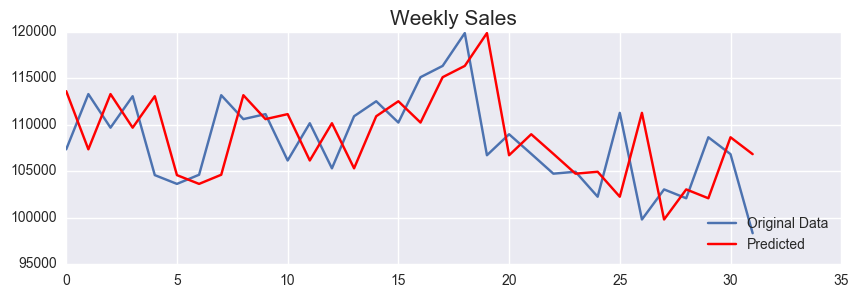

In [306]:
from matplotlib import pyplot

# plot the predictions using the test dataset against the actual data
pyplot.figure(figsize=(10,3))
pyplot.plot(test, label = 'Original Data')
pyplot.plot(predictions, color='red', label = 'Predicted')
pyplot.title('Weekly Sales', fontsize=15)
pyplot.legend(loc='lower right')
pyplot.show()

# 4. Model Selection and Fitting  
## *AR Model (Autoregression)* 

In [307]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_absolute_error
import numpy
from pandas import Series

# create a difference transform of the dataset
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)

# make a prediction give regression coefficients and lag obs
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat

series = Series.from_csv('dataset10_72.csv', header=0)
#series['Date'] =  pd.to_datetime(series['Date']) # Change object 'Date' to datetime 
#series = series.set_index('Date') # set 'Date' as index

# split dataset into train and test sets
X = difference(series.values) # returns a array set with all the elements from the set that are not in an iterable
size = int(len(X) * 0.66) # 66% of the data
train, test = X[0:size], X[size:]

Split the dataset into train and test sets than apply autoregression on the train data set.

In [308]:
# train autoregression
ar_model = AR(train) # apply autoregression on train data set
ar_model_fit = ar_model.fit(maxlag=6, disp=False) # fit the model
window = ar_model_fit.k_ar # determine the optimal lag
coef = ar_model_fit.params # determine the coefficients

# walk forward over time steps using the test data set
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

In [309]:
# Report performance for Autoregression Model
AR_mae=mean_absolute_error(test, predictions) #mean_absolute_error(y_true, y_pred)
print('Autoregression Model-MAE: %.3f' % AR_mae)

Autoregression Model-MAE: 3996.880


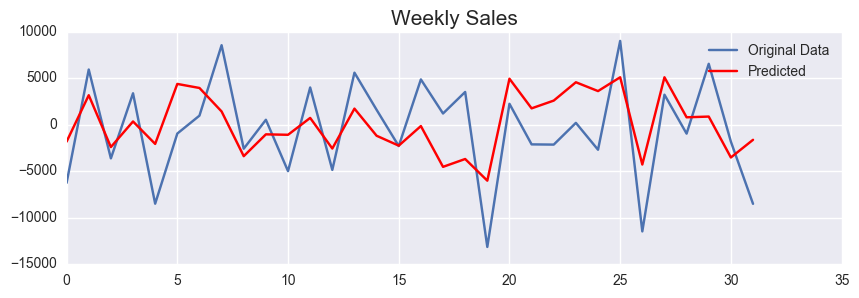

In [310]:
# plot the predictions using the test dataset against the original data
pyplot.figure(figsize=(10,3))
pyplot.plot(test, label = 'Original Data')
pyplot.plot(predictions, color='red', label = 'Predicted')
pyplot.title('Weekly Sales', fontsize=15)
pyplot.legend(loc='upper right')
pyplot.show()

## *MA Model (Moving Average)* 

In [311]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

series = Series.from_csv('dataset10_72.csv', header=1)


# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
predictions = list()

# prepare data
train_size = int(len(X) * 0.66) # Splitting point
train, test = X[0:train_size], X[train_size:]


# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=120310.810000, expected=107360.490000
predicted=116361.146667, expected=113300.270000
predicted=113650.970000, expected=109687.510000
predicted=110116.090000, expected=113071.510000
predicted=112019.763333, expected=104586.800000
predicted=109115.273333, expected=103643.010000
predicted=107100.440000, expected=104625.350000
predicted=104285.053333, expected=113179.620000
predicted=107149.326667, expected=110607.720000
predicted=109470.896667, expected=111144.590000
predicted=111643.976667, expected=106159.420000
predicted=109303.910000, expected=110167.180000
predicted=109157.063333, expected=105317.310000
predicted=107214.636667, expected=110918.730000
predicted=108801.073333, expected=112528.570000
predicted=109588.203333, expected=110240.210000
predicted=111229.170000, expected=115116.440000
predicted=112628.406667, expected=116330.250000
predicted=113895.633333, expected=119858.790000
predicted=117101.826667, expected=106724.020000
predicted=114304.353333, expected=108981

In [312]:
# Report performance for Moving Average Model
MA_mae = mean_absolute_error(test, predictions)
print('Moving Average MSE: %.3f' % MA_mae)

Moving Average MSE: 4600.948


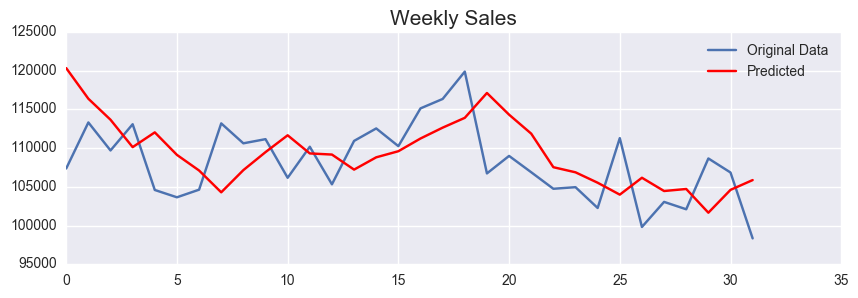

In [313]:
# plot the predictions using the test dataset against the original data
pyplot.figure(figsize=(10,3))
pyplot.plot(test, label = 'Original Data')
pyplot.plot(predictions, color='red', label = 'Predicted')
pyplot.title('Weekly Sales', fontsize=15)
pyplot.legend(loc='upper right')
pyplot.show()

## *ARIMA Model (Autoregressive Integrated Moving Average)* 

#### Stationarize the series

In [314]:
# create and summarize stationary version of time series
from pandas import Series
from statsmodels.tsa.stattools import adfuller

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

series = Series.from_csv('dataset10_72.csv', header=1)

X = series.values

# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]

# statistical test to check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.947026
p-value: 0.000028
Critical Values:
	10%: -2.590
	1%: -3.529
	5%: -2.904


The p-value > 0.05, therefore the data has a unit root and is non-stationary.

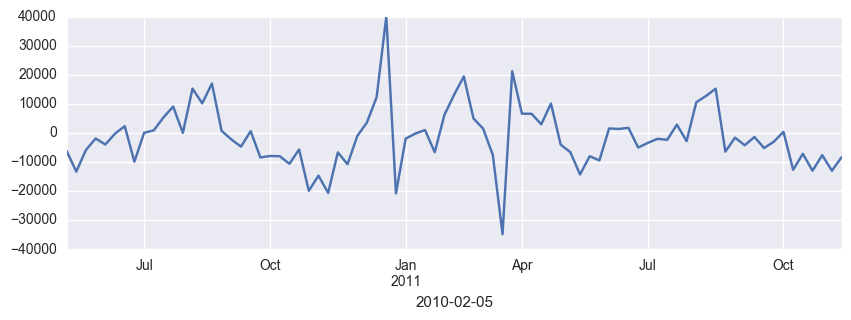

In [315]:
# save the differenced result
stationary.to_csv('stationary.csv')

# plot the differenced result
pyplot.figure(figsize=(10,3))
stationary.plot()
pyplot.show()

#### Plot ACF/PACF charts and find optimal parameters

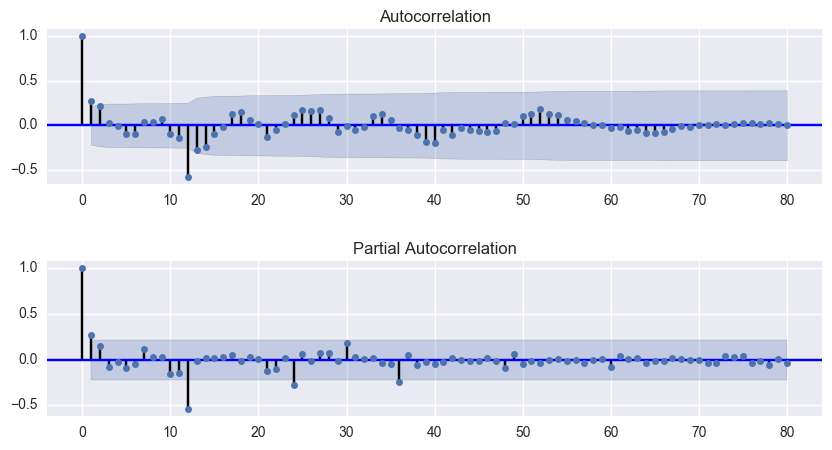

In [316]:
# ACF and PACF plots of time series
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

series = Series.from_csv('stationary.csv')

pyplot.figure(figsize=(10,5)).subplots_adjust(hspace=.5)
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca()) # plot Autocorrelation

pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca()) # plot Partial Autocorrelation
pyplot.show()

ACF shows a significant correlation at lags 4 and 12. PACF shows a significant correlation at lags 4, 12, and 24. Both the ACF and PACF trails off, indicating a stationary series.

#### Build the ARIMA Model and Make Predictions

In [317]:
# grid search ARIMA parameters for time series
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return MAE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.66)# Splitting point
    train, test = X[0:train_size], X[train_size:] 
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        autoarima_model = ARIMA(diff, order=arima_order)
        autoarima_model_fit = autoarima_model.fit(trend='nc', disp=0)
        yhat = autoarima_model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    mae = mean_absolute_error(test, predictions)
    return mae

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mae = evaluate_arima_model(dataset, order)
                    if mae < best_score:
                        best_score, best_cfg = mae, order
                    print('Auto ARIMA%s MAE=%.3f' % (order, mae))
                except:
                    continue
    print('Best Auto ARIMA%s MAE=%.3f' % (best_cfg, best_score))
   
# load data
series = Series.from_csv('dataset10_72.csv', header=1)

# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

Auto ARIMA(0, 0, 1) MAE=5760.944
Auto ARIMA(0, 0, 2) MAE=5421.048
Auto ARIMA(0, 1, 1) MAE=5629.150
Auto ARIMA(0, 1, 2) MAE=5552.971
Auto ARIMA(0, 2, 1) MAE=5440.865
Auto ARIMA(1, 0, 0) MAE=5507.691
Auto ARIMA(1, 0, 1) MAE=5451.455
Auto ARIMA(1, 0, 2) MAE=5350.166
Auto ARIMA(1, 1, 0) MAE=4928.408
Auto ARIMA(1, 1, 1) MAE=5296.931
Auto ARIMA(1, 2, 0) MAE=6302.339
Auto ARIMA(2, 0, 0) MAE=5403.885
Auto ARIMA(2, 0, 1) MAE=5386.403
Auto ARIMA(2, 0, 2) MAE=5210.614
Auto ARIMA(2, 1, 0) MAE=5458.980
Auto ARIMA(2, 1, 1) MAE=5184.668
Auto ARIMA(2, 1, 2) MAE=5163.930
Auto ARIMA(2, 2, 0) MAE=7297.889
Auto ARIMA(2, 2, 1) MAE=5472.646
Best Auto ARIMA(1, 1, 0) MAE=4928.408


In [318]:
# evaluate manually configured ARIMA model
from pandas import Series
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load data
series = Series.from_csv('dataset10_72.csv', header=1)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.66) # Splitting point
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    arima_model = ARIMA(diff, order=(1,1,0))
    arima_model_fit = arima_model.fit(trend='nc', disp=0)
    yhat = arima_model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=111005.967, Expected=107360
>Predicted=107852.695, Expected=113300
>Predicted=120436.224, Expected=109688
>Predicted=122459.381, Expected=113072
>Predicted=113471.803, Expected=104587
>Predicted=100944.398, Expected=103643
>Predicted=103125.939, Expected=104625
>Predicted=102861.242, Expected=113180
>Predicted=105614.301, Expected=110608
>Predicted=110849.902, Expected=111145
>Predicted=112749.851, Expected=106159
>Predicted=111722.576, Expected=110167
>Predicted=103176.910, Expected=105317
>Predicted=110606.476, Expected=110919
>Predicted=107463.143, Expected=112529
>Predicted=113485.276, Expected=110240
>Predicted=104400.266, Expected=115116
>Predicted=107876.594, Expected=116330
>Predicted=116315.318, Expected=119859
>Predicted=127237.491, Expected=106724
>Predicted=114252.525, Expected=108981
>Predicted=107311.597, Expected=106874
>Predicted=103097.740, Expected=104742
>Predicted=107444.349, Expected=104948
>Predicted=101840.627, Expected=102264
>Predicted=106872.735, Ex

In [319]:
# Report performance for ARIMA Model
ARIMA_mae=mean_absolute_error(test, predictions) #mean_absolute_error(y_true, y_pred)
print('ARIMA Model MAE: %.3f' % ARIMA_mae)

ARIMA Model MAE: 4928.408


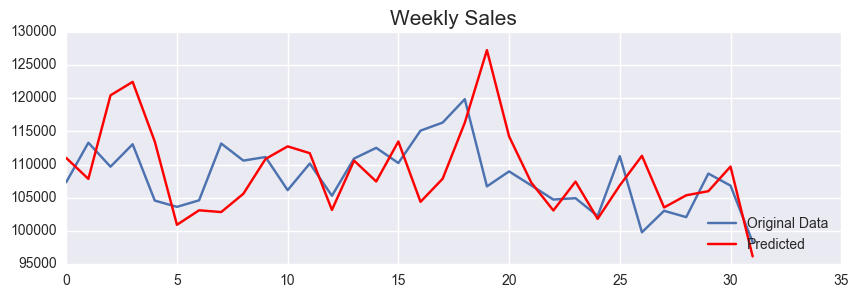

In [320]:
# plot the predictions using the test dataset against the original data
pyplot.figure(figsize=(10,3))
pyplot.plot(test, label = 'Original Data')
pyplot.plot(predictions, color='red', label = 'Predicted')
pyplot.title('Weekly Sales', fontsize=15)
pyplot.legend(loc='lower right')
pyplot.show()

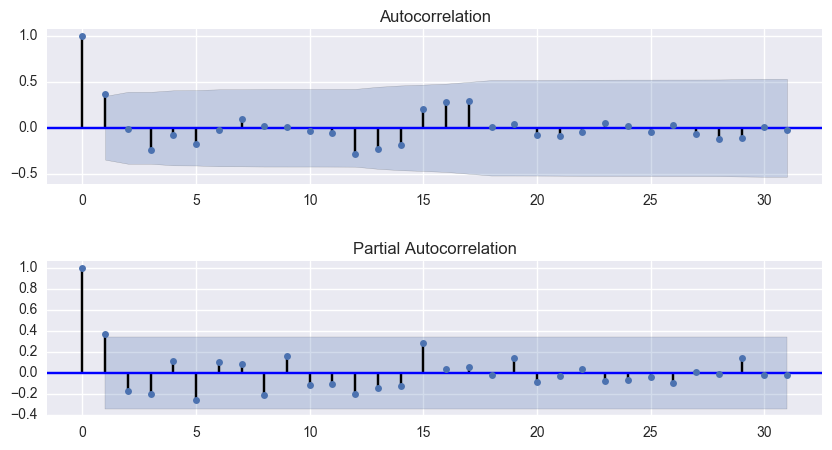

In [321]:
pyplot.figure(figsize=(10,5)).subplots_adjust(hspace=.5)
pyplot.subplot(211)
plot_acf(predictions, ax=pyplot.gca()) # plot Autocorrelation

pyplot.subplot(212)
plot_pacf(predictions, ax=pyplot.gca()) # plot Partial Autocorrelation
pyplot.show()

## *SARIMA Model (Seasonal Autoregressive Integrated Moving Average Model)* 

The SARIMA model has 4 additional parameters (P-AR parameters,D-differences,Q-MA parameters,s-periodicity) on top of the three (p-AR parameters,d-differences,q-MA parameters) that are in ARMIA.

D-differences is 0 because there is seasonality difference.  
s-periodicity is 12 since the number of observations that make up the seasonal cycle is 12 months.

In [322]:
# evaluate manually configured ARIMA model
from pandas import Series
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np

import datetime as dt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load data
series = Series.from_csv('dataset10_72.csv', header=1)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.66) # Splitting point
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    sarima_model = tsa.SARIMAX(diff, order=(0,1,1),seasonal_order=(0,0,1,12),enforce_stationarity=False,enforce_invertibility=False)
    sarima_model_fit = sarima_model.fit(trend='nc', disp=0)
    yhat = sarima_model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=110984.572, Expected=107360
>Predicted=111905.455, Expected=113300
>Predicted=108611.561, Expected=109688
>Predicted=110647.904, Expected=113072
>Predicted=107618.077, Expected=104587
>Predicted=105524.846, Expected=103643
>Predicted=111291.649, Expected=104625
>Predicted=109599.550, Expected=113180
>Predicted=109364.203, Expected=110608
>Predicted=104979.282, Expected=111145
>Predicted=105253.130, Expected=106159
>Predicted=108771.567, Expected=110167
>Predicted=109664.588, Expected=105317
>Predicted=110417.734, Expected=110919
>Predicted=107491.011, Expected=112529
>Predicted=109910.731, Expected=110240
>Predicted=105991.245, Expected=115116
>Predicted=105243.440, Expected=116330
>Predicted=111073.949, Expected=119859
>Predicted=113095.651, Expected=106724
>Predicted=111295.132, Expected=108981
>Predicted=107054.552, Expected=106874
>Predicted=106141.182, Expected=104742
>Predicted=109470.287, Expected=104948
>Predicted=109191.532, Expected=102264
>Predicted=111450.062, Ex

In [323]:
# Report performance for SARIMA Model
SARIMA_mae=mean_absolute_error(test, predictions) #mean_absolute_error(y_true, y_pred)
print('SARIMA Model MAE: %.3f' % SARIMA_mae)

SARIMA Model MAE: 4038.059


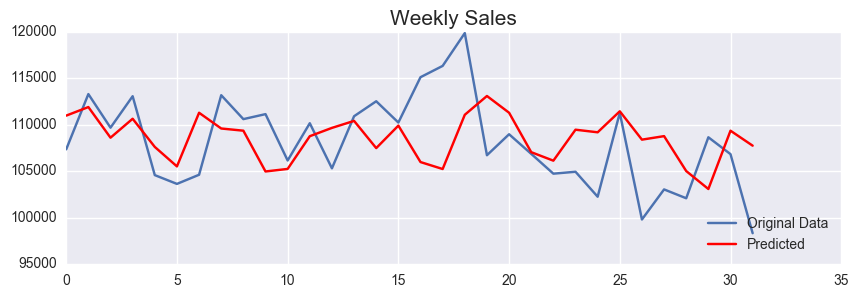

In [324]:
# plot the predictions using the test dataset against the original data
pyplot.figure(figsize=(10,3))
pyplot.plot(test, label = 'Original Data')
pyplot.plot(predictions, color='red', label = 'Predicted')
pyplot.title('Weekly Sales', fontsize=15)
pyplot.legend(loc='lower right')
pyplot.show()

In [325]:
# residual errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

                  0
count     32.000000
mean    -374.841651
std     5128.280346
min    -9411.141409
25%    -3804.879008
50%     -175.209147
75%     1652.610422
max    11086.809969


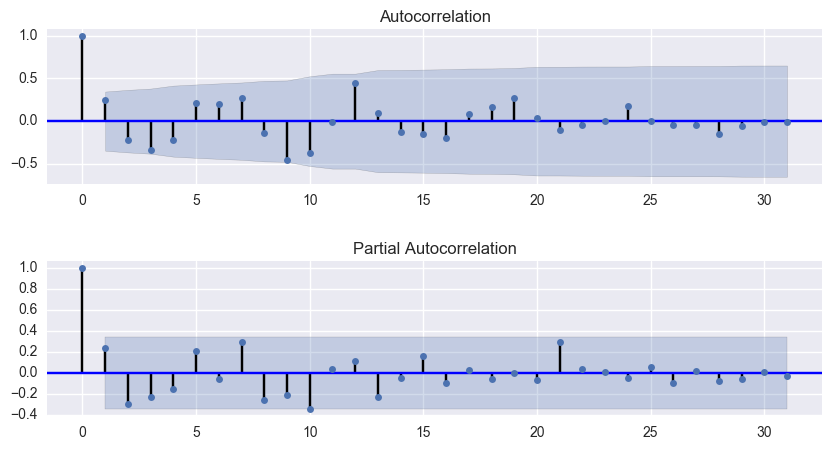

In [326]:
pyplot.figure(figsize=(10,5)).subplots_adjust(hspace=.5)
pyplot.subplot(211)
plot_acf(predictions, ax=pyplot.gca()) # plot Autocorrelation

pyplot.subplot(212)
plot_pacf(predictions, ax=pyplot.gca()) # plot Partial Autocorrelation
pyplot.show()

# 5. Model Evaluation  
#### Report Performance Metrics

In [328]:
# report performance for All Time Series Models
print('Persistence MAE: %.3f' % PM_mae)
print('Autoregression Model MAE: %.3f' % AR_mae)
print('Moving Average Model MAE: %.3f' % MA_mae)
print('ARIMA Model MAE: %.3f' % ARIMA_mae)
print('SARIMA Model MAE: %.3f' % SARIMA_mae)

Persistence MAE: 4321.341
Autoregression Model MAE: 3996.880
Moving Average Model MAE: 4600.948
ARIMA Model MAE: 4928.408
SARIMA Model MAE: 4038.059


# 6. Model Validation  

### Finalize Model  

### Make Prediction  

### Validate Model 

# 7. Prepare Results of FInal Model for Delivery